In [1]:
import os
import tarfile
import urllib

In [2]:
# 깔금한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# 그림을 저장할 위치
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [3]:
import pandas as pd
import numpy as np
import itertools

In [4]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets",'housing')
HOUSING_URL = DOWNLOAD_ROOT + 'datasets/housing/housing.tgz'
def fetch_housing_data(housing_url = HOUSING_URL,housing_path = HOUSING_PATH):
    os.makedirs(housing_path,exist_ok = True) 
    # 폴더 생성 경로에 폴더가 없을 경우 자동으로 생성해주는 mkdir -p옵션을 이용할 수 있는 파이썬 코드가
    # makedirs(exist_ok = True) 이다.
    tgz_path = os.path.join(housing_path,'housing.tgz')
    urllib.request.urlretrieve(housing_url,tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path = housing_path) # tarball압축 해제!
    housing_tgz.close()

In [5]:
fetch_housing_data()

In [6]:
import pandas as pd
def load_housing_data(housing_path = HOUSING_PATH):
    csv_path = os.path.join(housing_path,'housing.csv')
    return pd.read_csv(csv_path)

In [7]:
housing = load_housing_data()

In [8]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [9]:
housing_target = housing.median_house_value

In [10]:
housing_prepared_index = housing.columns.difference(housing['median_house_value'])

In [11]:
housing_prepared = housing[housing_prepared_index]

### EDA시작

In [12]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [13]:
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [14]:
housing.describe(include = 'all')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<1H OCEAN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9136
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,NaN
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874,NaN
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,NaN
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000,NaN
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,NaN
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000,NaN


C:\Anaconda\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Anaconda\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Anaconda\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Anaconda\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
T

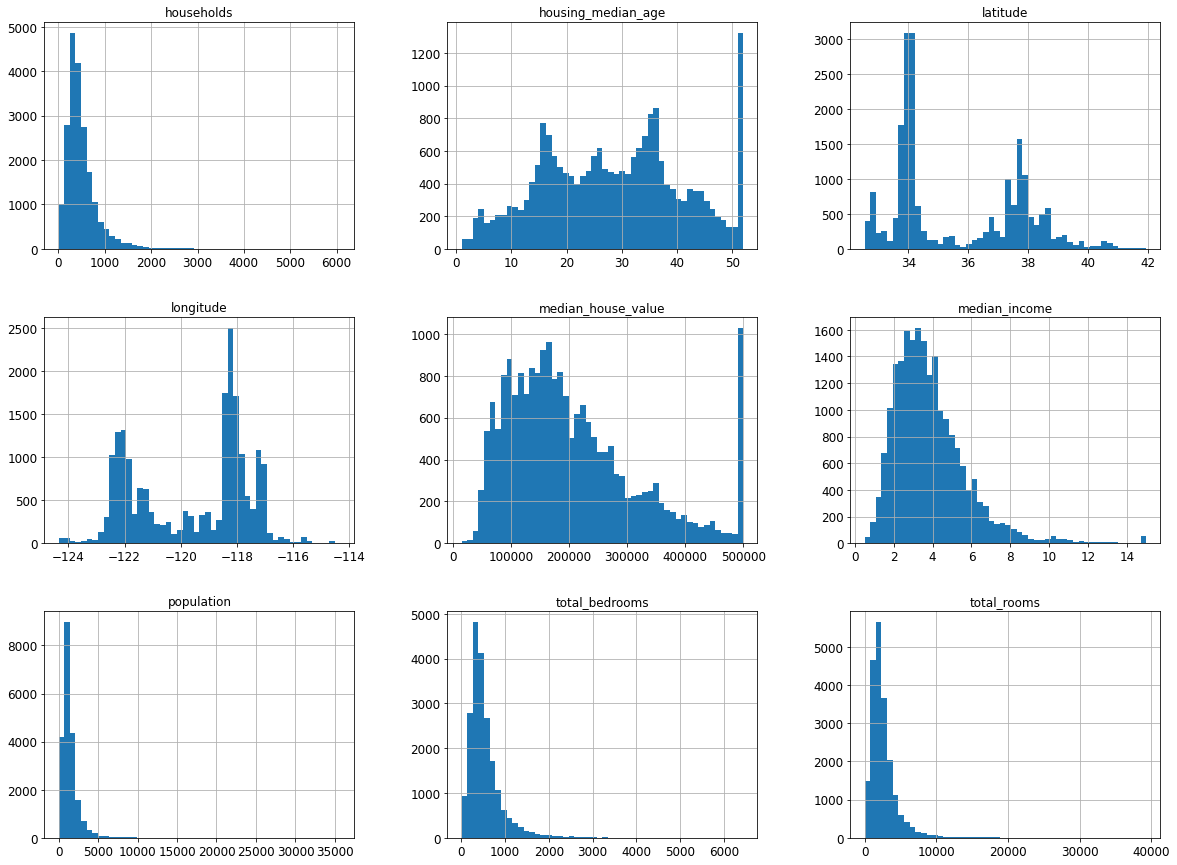

In [15]:
housing.hist(bins = 50,figsize = (20,15))
plt.show()

age와 target값이 최대값 기준으로 한계값이 설정되어있는 듯

상관계수 보기

In [16]:
housing.corr()['median_house_value'].sort_values(ascending = False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

데이터 채워넣기

In [17]:
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [18]:
median = housing.total_bedrooms.median()
housing.total_bedrooms = housing.total_bedrooms.fillna(median)

sklearn SimpleImputer있다는 것 잊지 말자

In [19]:
housing.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [20]:
housing['rooms_per_household'] = housing['total_rooms'] / housing['households']
housing['bedrooms_per_room'] = housing['total_bedrooms'] / housing['total_rooms']
housing['population_per_household'] = housing['population'] / housing['households']

1차 예상.. 쓸모없는 변수가 누굴까

In [21]:
housing.corr()['median_house_value'].sort_values(ascending = False)

median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049457
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.233303
Name: median_house_value, dtype: float64

##### 중간 소득이 중요하다고 가정,,

테스트 세트가 전체 데이터 셋에 있는 여러 소득 카테고리르 잘 대표해야함

#### 구간을 설정하자

In [22]:
# 구간 : [0,1.5)~> 0 이상 1.5 미만 (뒷부분 미포함)
housing['income_cat'] = pd.cut(housing.median_income,bins = [0,1.5,3,4.5,6,np.inf],labels = [1,2,3,4,5])

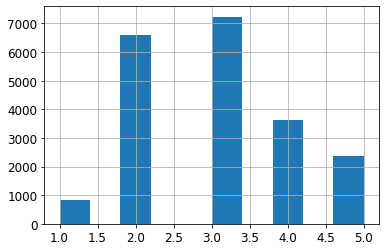

In [23]:
housing.income_cat.hist()

계층 샘플링 직접 코드로 짜보자

In [24]:
# 코딩으로 짜보자
Ratio = round(housing.income_cat.value_counts() / housing.income_cat.value_counts().sum(),2)
Ratio

3    0.35
2    0.32
4    0.18
5    0.11
1    0.04
Name: income_cat, dtype: float64

아래 코딩 활용 ~> 인덱스 제거.
```
import numpy as np
import itertools

a = np.array([1,2,3,4,5,6,7,8,9])
index=[2,3,6]
a = np.array(list(itertools.compress(a, [i not in index for i in range(len(a))])))
a
```

In [60]:
def Stratifiedsample(data,ratio):
    # 코딩으로 짜보자
    Ratio = round(housing.income_cat.value_counts() / housing.income_cat.value_counts().sum(),2) # 기존 데이터의 비율.
    test_indices_list = []
    test_indices_total = []
    for i in sorted(list(Ratio.index)):
        test_indices_list.append(list(housing[housing.income_cat==i].sample(frac= ratio).index))
        test_indices_total.extend(list(housing[housing.income_cat==i].sample(frac= ratio).index))
    
    # Train indices 구하기.
    Total_indices = list(data.index)
    train_indices = itertools.compress(Total_indices,[i not in test_indices_total for i in range(len(Total_indices))])
    
    test_data_list = []
    for i in range(len(test_indices_list)):
        test_data_list.append(housing.iloc[test_indices_list[i]])
        
    train_data = data.loc[train_indices]
    test_data = pd.concat(test_data_list,axis = 0)
    return train_data, test_data

라이브러리 이용

In [65]:
%%time
strat_train_data1, strat_test_data1 = Stratifiedsample(housing,0.2)

Wall time: 2 s


In [62]:
from sklearn.model_selection import StratifiedShuffleSplit

In [63]:
split = StratifiedShuffleSplit(n_splits = 1, test_size= 0.2,random_state = 42)

In [64]:
%%time
for train_index, test_index in split.split(housing,housing['income_cat']):
    strat_train_data2 = housing.loc[train_index]
    strat_test_data2 = housing.loc[test_index]

Wall time: 29 ms


##### 내가 짜논 코드와 라이브러리 코드  비교

속도는.. 라이브러리 코드가 우수

크기 비교

In [66]:
strat_train_data1.shape

(16513, 14)

In [67]:
strat_train_data2.shape

(16512, 14)

계층별 샘플 비율 비교

In [68]:
# 내가 짠 코드
strat_train_data1.income_cat.value_counts() /strat_train_data1.income_cat.value_counts().sum()

3    0.350572
2    0.318840
4    0.176285
5    0.114455
1    0.039847
Name: income_cat, dtype: float64

In [35]:
# 라이브러리 코드
strat_train_data2.income_cat.value_counts() /strat_train_data2.income_cat.value_counts().sum()

3    0.350594
2    0.318859
4    0.176296
5    0.114402
1    0.039850
Name: income_cat, dtype: float64

### 데이터 나누는 것 알지만 한번 쭉 복습

##### train, test분리

방법 1) 

In [36]:
def split_train_test(data,test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [37]:
train1, test1 = split_train_test(housing,0.2)

방법2) 해시값 이용

In [38]:
from zlib import crc32

In [39]:
def test_set_check(indentifier,test_ratio):
    return crc32(np.int64(indentifier)) & 0xffffff < test_ratio * 2 **32

In [40]:
def split_train_test_by_id(data,test_ratio,id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_ : test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [41]:
housing_with_id = housing.reset_index()

In [42]:
train_set,test_set = split_train_test_by_id(housing_with_id,0.2,'index')

방법3) 우리가 아는 그것

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
train_set, test_set = train_test_split(housing,test_size = 0.2,random_state = 42)

이어서 시작

##### LabelEncoder

In [69]:
strat_train_data1.ocean_proximity = strat_train_data1.ocean_proximity.astype('category')

In [70]:
# 이것으로 LabelEncoder해도 되지만,, OnehotEncoder진행해보자
strat_train_data1.ocean_proximity.cat.codes

0        3
1        3
3        3
4        3
5        3
        ..
20634    1
20635    1
20636    1
20637    1
20638    1
Length: 16513, dtype: int8

In [71]:
# 희소행렬... 
pd.get_dummies(strat_train_data1.ocean_proximity).values

array([[0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       ...,
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0]], dtype=uint8)

In [72]:
# sklearn 이용
from sklearn.preprocessing import OneHotEncoder

In [73]:
cat_encoder = OneHotEncoder()
train_ocean_1hot = cat_encoder.fit_transform(np.array(strat_train_data1.ocean_proximity.values).reshape(-1,1)) # 위에 category로 바꿔버러서..ㅠㅠ

In [74]:
train_ocean_1hot.toarray()

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

지금까지 했던 작업<br>
1. fillna
2. 파생변수 생성<br>


<b> 순서 변경</b>
3. 수치형, 범주형 변수 나누기, <br>그리고 수치형은 표준화, 범주형은 onehotencoder(LabelEnconder 경우 오해 발생 여지 때문..)  ~ train,test 
4. train,test data나누기(계층샘플링) 
 

##### 파생변수 추가 속성 넣기

In [75]:
from sklearn.base import BaseEstimator, TransformerMixin

In [77]:
housing2 = load_housing_data()

In [78]:
housing2.loc[:,list(housing2.columns.difference(housing2.columns[housing2.dtypes == 'object']))]

,households,housing_median_age,latitude,longitude,median_house_value,median_income,population,total_bedrooms,total_rooms
0,126.0,41.0,37.88,-122.23,452600.0,8.3252,322.0,129.0,880.0
1,1138.0,21.0,37.86,-122.22,358500.0,8.3014,2401.0,1106.0,7099.0
2,177.0,52.0,37.85,-122.24,352100.0,7.2574,496.0,190.0,1467.0
3,219.0,52.0,37.85,-122.25,341300.0,5.6431,558.0,235.0,1274.0
4,259.0,52.0,37.85,-122.25,342200.0,3.8462,565.0,280.0,1627.0
...,...,...,...,...,...,...,...,...,...
20635,330.0,25.0,39.48,-121.09,78100.0,1.5603,845.0,374.0,1665.0
20636,114.0,18.0,39.49,-121.21,77100.0,2.5568,356.0,150.0,697.0
20637,433.0,17.0,39.43,-121.22,92300.0,1.7000,1007.0,485.0,2254.0
20638,349.0,18.0,39.43,-121.32,84700.0,1.8672,741.0,409.0,1860.0


In [79]:
housing2.iloc[:,3]

0         880.0
1        7099.0
2        1467.0
3        1274.0
4        1627.0
          ...  
20635    1665.0
20636     697.0
20637    2254.0
20638    1860.0
20639    2785.0
Name: total_rooms, Length: 20640, dtype: float64

In [80]:
income_cat = pd.cut(housing2.iloc[:,7].values,bins = [0,1.5,3.0,4.5,6,np.inf],labels = [1,2,3,4,5])

In [81]:
income_cat

[5, 5, 5, 4, 3, ..., 2, 2, 2, 2, 2]
Length: 20640
Categories (5, int64): [1 < 2 < 3 < 4 < 5]

In [82]:
housing2.iloc[:,7] = income_cat
housing2.iloc[:,7]

0        5
1        5
2        5
3        4
4        3
        ..
20635    2
20636    2
20637    2
20638    2
20639    2
Name: median_income, Length: 20640, dtype: category
Categories (5, int64): [1 < 2 < 3 < 4 < 5]

In [83]:
housing2.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,5,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,5,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,5,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,4,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3,342200.0,NEAR BAY


In [84]:
list(housing2.columns).index('median_income')

7

In [85]:
A = np.array([1,2,3,4,5])
A[0] = 0
A

array([0, 2, 3, 4, 5])

In [86]:
# 자체가 Numpy로 받는다!
class Attribute_Adj(BaseEstimator,TransformerMixin):
    
    def __init__(self,rooms_ix=3,bedrooms_ix=4,population_ix=5,households_ix=6,median_income_ix = 7,Derivation = False,TypeDivide = False,Split = False,): # 파이프라인 짤 때 반응하게끔 만들자!
        """
        아래 에러 때문에
        only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices
        
        열의 인덱스를 직접 입력했음
        
        input Type고정시키자
        
        """
        self.Derivation = Derivation # input : numpy
        self.TypeDivide = TypeDivide # input : DataFrame
        self.Split = Split # input : DataFrme()
        self.rooms_ix = rooms_ix
        self.bedrooms_ix = bedrooms_ix
        self.population_ix = population_ix
        self.households_ix = households_ix
        self.median_income_ix = median_income_ix
        
    def fit(self,X,y = None):
        return self
    
    def transform(self,X):
        if self.Derivation:
            rooms_per_household = X[:,self.rooms_ix] / X[:,self.households_ix]
            
            bedrooms_per_room = X[:,self.bedrooms_ix] / X[:,self.rooms_ix]
            population_per_household = X[:,self.population_ix] / X[:,self.households_ix]
            X = np.c_[X,rooms_per_household,bedrooms_per_room,population_per_household]
            return X
    
      
    
        """ 출력 순서는 수치형, objectg형 순으로, 애는 DataFrame형태로 준다."""
        if self.TypeDivide:
            attrib_cat_indices = list(X[X.columns[X.dtypes == 'object']])
            attrib_cat = X.loc[:,attrib_cat_indices]
            # 열 순서 보존을 위해 sort = Fasle함수 
            attrib_num_indices = list(X.columns.difference(X.columns[X.dtypes == 'object'],sort= False)) # object아닌 data type을 전부 숫자형이라 생각.
            attrib_num = X.loc[:,attrib_num_indices]
            return attrib_num , attrib_cat
        
        """ 출력순서 : Train, Test 순서대로, 애는 DataFrame형태로 준다."""
        if self.Split:
            X.loc[:,'income_cat'] = pd.cut(X.loc[:,'median_income'],bins = [0,1.5,3.0,4.5,6,np.inf],labels = [1,2,3,4,5])
            split = StratifiedShuffleSplit(n_splits =1, test_size = 0.2,random_state = 42)
            for train_index, test_index in split.split(X,X['income_cat']):
                strat_train_data = X.loc[train_index]
                strat_test_data = X.loc[test_index]
                
            return strat_train_data, strat_test_data
        
        else:
            return X

In [87]:
attrib_num_indices = list(housing2.columns.difference(housing2.columns[housing2.dtypes == 'object'],sort = False)) # object아닌 data type을 전부 숫자형이라 생각.

In [88]:
attrib_num_indices

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value']

cross_val참고자료 : https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation

# 파이프라인 짜기!

In [136]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

##### housing2라는 새로운 데이터를 대상으로 파이프라인 짜보자

In [99]:
housing2 = load_housing_data()

1st. train, test데이터 나누고,, Train data만 보자!! 

In [100]:
Split_data = Attribute_Adj(Split =True)

In [101]:
train_data , test_data = Split_data.fit_transform(housing2)
train_data_set = train_data.drop(['median_house_value'],axis = 1)
train_data_labels = train_data['median_house_value'].copy()

In [128]:
test_data_set = test_data.drop(['median_house_value'],axis = 1)
test_data_labels = test_data['median_house_value'].copy()

2nd. 형태에 따라 데이터 나누고

In [102]:
divide_attribute = Attribute_Adj(TypeDivide = True)

In [103]:
att_num, att_cat = divide_attribute.transform(train_data_set)

In [104]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

수치형 데이터 처리하는 파이프라인 짜고

In [105]:
num_pipeline = Pipeline([
    ('imputer',SimpleImputer(strategy = 'median')),
    ('attrib_plus',Attribute_Adj(Derivation = True)),
   ('std_scaler',StandardScaler()),
])

In [106]:
# numpy 넣어도 되고, DataFrame넣어도 된다. 내가 만든 사용자 정의 클래스로 들어갈 때 DataFrame에 있는 값을 자동으로 인식해서 계산..
# 그래서 결과는 numpy배열로 나온다.
att_num_tr = num_pipeline.fit_transform(att_num) 

In [107]:
att_num_tr

array([[-1.15604281,  0.77194962,  0.74333089, ..., -0.31205452,
         0.15531753, -0.08649871],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.21768338,
        -0.83628902, -0.03353391],
       [ 1.18684903, -1.34218285,  0.18664186, ..., -0.46531516,
         0.4222004 , -0.09240499],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.3469342 ,
        -0.52177644, -0.03055414],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.02499488,
        -0.30340741,  0.06150916],
       [-1.43579109,  0.99645926,  1.85670895, ..., -0.22852947,
         0.10180567, -0.09586294]])

수치형과 범주형 동시에 처리하는 파이프라인 구축하고

In [108]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [109]:
num_attribs = list(att_num)
cat_attribs = list(att_cat)

full_pipeline = ColumnTransformer([
    ('num',num_pipeline,num_attribs),
    ('cat',OneHotEncoder(),cat_attribs),
])

In [115]:
# 변환 후 학습 단계에 적용할 데이터
Data_train = full_pipeline.fit_transform(train_data_set)

In [117]:
pd.DataFrame(Data_train)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,-1.156043,0.771950,0.743331,-0.493234,-0.445438,-0.636211,-0.420698,-0.614937,-0.954456,-0.312055,0.155318,-0.086499,1.0,0.0,0.0,0.0,0.0
1,-1.176025,0.659695,-1.165317,-0.908967,-1.036928,-0.998331,-1.022227,1.336459,1.890305,0.217683,-0.836289,-0.033534,1.0,0.0,0.0,0.0,0.0
2,1.186849,-1.342183,0.186642,-0.313660,-0.153345,-0.433639,-0.093318,-0.532046,-0.954456,-0.465315,0.422200,-0.092405,0.0,0.0,0.0,0.0,1.0
3,-0.017068,0.313576,-0.290520,-0.362762,-0.396756,0.036041,-0.383436,-1.045566,-0.954456,-0.079661,-0.196453,0.089736,0.0,1.0,0.0,0.0,0.0
4,0.492474,-0.659299,-0.926736,1.856193,2.412211,2.724154,2.570975,-0.441437,-0.006202,-0.357834,0.269928,-0.004194,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16507,0.722267,-0.673331,1.379547,-0.632123,-0.725361,-0.759010,-0.764049,0.554158,0.942051,0.234352,-0.428853,-0.031755,0.0,1.0,0.0,0.0,0.0
16508,1.007011,-0.823004,0.902385,-0.667196,-0.584183,-0.329664,-0.636291,-0.948815,-0.954456,-0.308114,0.491503,0.084689,0.0,1.0,0.0,0.0,0.0
16509,1.586489,-0.724781,-1.562952,1.043901,0.822735,0.607904,0.713156,-0.316705,-0.006202,0.346934,-0.521776,-0.030554,0.0,1.0,0.0,0.0,0.0
16510,0.782213,-0.851068,0.186642,-0.309919,-0.374849,-0.057178,-0.375451,0.098121,-0.006202,0.024995,-0.303407,0.061509,1.0,0.0,0.0,0.0,0.0


이제 데이터 처리에 대한 파이프라인과 훈련 및 그 이후에 대한 파이프라인을 연결해준다

In [112]:
Result_pipeline = Pipeline([
    ('Transformer',full_pipeline),
])

여기서 input은 train_data!

In [113]:
Result_pipeline.fit_transform(train_data_set)

array([[-1.15604281,  0.77194962,  0.74333089, ...,  0.        ,
         0.        ,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43579109,  0.99645926,  1.85670895, ...,  0.        ,
         1.        ,  0.        ]])

모델 구축 + feature_importances구축 + 세부 튜닝 => 답지 보면서 공부

In [118]:
Data_train

array([[-1.15604281,  0.77194962,  0.74333089, ...,  0.        ,
         0.        ,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43579109,  0.99645926,  1.85670895, ...,  0.        ,
         1.        ,  0.        ]])

In [119]:
train_data_labels

17606    286600.0
18632    340600.0
14650    196900.0
3230      46300.0
3555     254500.0
           ...   
6563     240200.0
12053    113000.0
13908     97800.0
11159    225900.0
15775    500001.0
Name: median_house_value, Length: 16512, dtype: float64

In [129]:
Data_test = full_pipeline.transform(test_data_set)

In [120]:
from sklearn.svm import SVR

In [138]:
model1 = SVR()

In [139]:
%%time
model1 = model.fit(Data_train,train_data_labels)

C:\Anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [140]:
predictions = model1.predict(Data_test)

In [141]:
mean_squared_error(test_data_labels,predictions)

13638823344.906254

GridSearchCV 적용

SVC의 gamma 매개변수의 기본값은 ‘auto’이며 이 값의 의미는 특성 개수의 역수입니다. 즉 1/X_train.shape[1]이 됩니다

In [142]:
from sklearn.model_selection import GridSearchCV

In [143]:
param = {
    'kernel': ['rbf','linear'],
    "C" : [1,3,10,30,100,300],
    'gamma' : [0.01,0.03,0.1,0.3,1.0,3.0]
}

In [144]:
model2 = SVR()

In [145]:
grid_search = GridSearchCV(model2, param,scoring = 'neg_mean_squared_error',cv = 5,verbose = 2)

In [146]:
grid_search.fit(Data_train,train_data_labels)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV] C=1, gamma=0.01, kernel=rbf .....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ...................... C=1, gamma=0.01, kernel=rbf, total=  15.6s
[CV] C=1, gamma=0.01, kernel=rbf .....................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   15.5s remaining:    0.0s


[CV] ...................... C=1, gamma=0.01, kernel=rbf, total=  15.5s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ...................... C=1, gamma=0.01, kernel=rbf, total=  17.5s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ...................... C=1, gamma=0.01, kernel=rbf, total=  15.5s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ...................... C=1, gamma=0.01, kernel=rbf, total=  17.2s
[CV] C=1, gamma=0.01, kernel=linear ..................................
[CV] ................... C=1, gamma=0.01, kernel=linear, total=   9.5s
[CV] C=1, gamma=0.01, kernel=linear ..................................
[CV] ................... C=1, gamma=0.01, kernel=linear, total=   9.6s
[CV] C=1, gamma=0.01, kernel=linear ..................................
[CV] ................... C=1, gamma=0.01, kernel=linear, total=   9.6s
[CV] C=1, gamma=0.01, kernel=linear ..................................
[CV] .

KeyboardInterrupt: 


질문: GridSearchCV를 RandomizedSearchCV로 바꿔보세요.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import expon, reciprocal

# expon(), reciprocal()와 그외 다른 확률 분포 함수에 대해서는
# https://docs.scipy.org/doc/scipy/reference/stats.html를 참고하세요.

# 노트: kernel 매개변수가 "linear"일 때는 gamma가 무시됩니다.
param_distribs = {
        'kernel': ['linear', 'rbf'],
        'C': reciprocal(20, 200000),
        'gamma': expon(scale=1.0),
    }

svm_reg = SVR()
rnd_search = RandomizedSearchCV(svm_reg, param_distributions=param_distribs,
                                n_iter=50, cv=5, scoring='neg_mean_squared_error',
                                verbose=2, random_state=42)
rnd_search.fit(housing_prepared, housing_labels)

In [ ]:
negative_mse = rnd_search.best_score_
rmse = np.sqrt(-negative_mse)
rmse


이번에는 RBF 커널에 대해 최적의 하이퍼파라미터 조합을 찾았습니다. 보통 랜덤서치가 같은 시간안에 그리드서치보다 더 좋은 하이퍼파라미터를 찾습니다.

여기서 사용된 scale=1.0인 지수 분포를 살펴보겠습니다. 일부 샘플은 1.0보다 아주 크거나 작습니다. 하지만 로그 분포를 보면 대부분의 값이 exp(-2)와 exp(+2), 즉 0.1과 7.4 사이에 집중되어 있음을 알 수 있습니다.

In [148]:
from scipy.stats import expon, reciprocal

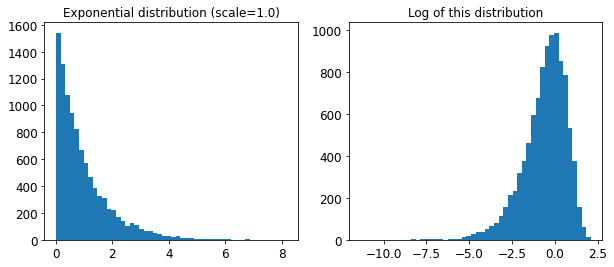

In [149]:
expon_distrib = expon(scale=1.)
samples = expon_distrib.rvs(10000, random_state=42)
plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.title("Exponential distribution (scale=1.0)")
plt.hist(samples, bins=50)
plt.subplot(122)
plt.title("Log of this distribution")
plt.hist(np.log(samples), bins=50)
plt.show()

C에 사용된 분포는 매우 다릅니다. 주어진 범위안에서 균등 분포로 샘플링됩니다. 그래서 오른쪽 로그 분포가 거의 일정하게 나타납니다. 이런 분포는 원하는 스케일이 정확이 무엇인지 모를 때 사용하면 좋습니다:

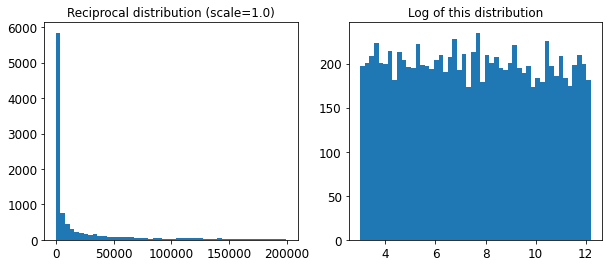

In [150]:

reciprocal_distrib = reciprocal(20, 200000)
samples = reciprocal_distrib.rvs(10000, random_state=42)
plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.title("Reciprocal distribution (scale=1.0)")
plt.hist(samples, bins=50)
plt.subplot(122)
plt.title("Log of this distribution")
plt.hist(np.log(samples), bins=50)
plt.show()


reciprocal() 함수는 하이퍼파라미터의 스케일에 대해 전혀 감을 잡을 수 없을 때 사용합니다(오른쪽 그래프에서 볼 수 있듯이 주어진 범위안에서 모든 값이 균등합니다). 반면 지수 분포는 하이퍼파라미터의 스케일을 (어느정도) 알고 있을 때 사용하는 것이 좋습니다.

참고자료 : https://analysis-flood.tistory.com/72

##### 시간 상 파라미터 값 복붙


{'C': 157055.10989448498, 'gamma': 0.26497040005002437, 'kernel': 'rbf'}

In [151]:
param_dict = {
    'C' : 157055.10989448498,
    'gamma' :  0.26497040005002437,
    'kernel' : 'rbf'
    
}

In [152]:
svm_reg = SVR(**param_dict)
svm_reg.fit(Data_train,train_data_labels)

SVR(C=157055.10989448498, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma=0.26497040005002437, kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [155]:
svm_reg.predict(Data_test)

array([483844.96868316, 279335.12898261, 276908.08198783, ...,
       358160.79814794, 131910.65964987, 189984.5537215 ])

In [156]:
svm_reg

0

In [153]:
from sklearn.base import BaseEstimator, TransformerMixin

def indices_of_top_k(arr, k):
    return np.sort(np.argpartition(np.array(arr), -k)[-k:])

class TopFeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self, feature_importances, k):
        self.feature_importances = feature_importances
        self.k = k
    def fit(self, X, y=None):
        self.feature_indices_ = indices_of_top_k(self.feature_importances, self.k)
        return self
    def transform(self, X):
        return X[:, self.feature_indices_]

노트: 이 특성 선택 클래스는 이미 어떤 식으로든 특성 중요도를 계산했다고 가정합니다(가령 RandomForestRegressor을 사용하여). TopFeatureSelector의 fit() 메서드에서 직접 계산할 수도 있지만 (캐싱을 사용하지 않을 경우) 그리드서치나 랜덤서치의 모든 하이퍼파라미터 조합에 대해 계산이 일어나기 때문에 매우 느려집니다.

나머지 참고자료 : https://github.com/rickiepark/handson-ml2/blob/master/02_end_to_end_machine_learning_project.ipynb